<a href="https://colab.research.google.com/github/codsalah/Machine-Learning-Projects/blob/main/PHONE_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'mobile-phone-price:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2980968%2F5131895%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240411%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240411T000344Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D7b0b85b4717fef089dae2b7efe1a2cbaa31a08113b4424bb9ec97314312c93420a4a11a771c1fb26d250397afc4a7e6cee263074af5781f7c9d2cd4b887128638cd0b328318be0cf404cce0e2cb5914615d22f2fcbb61423950ee3644f4c8eb35b13e1196f975d916c73863d636d6d04ee25b55bc69da18ee97d114cb06ecd6cf7ddd709f6ce25940e0c37e0a401a0e4f4ef59cbb242b8ddac1b990a85bfd1c2a01d3a2fe40637c56e2778ef139250be55181a01a80ed0f194b4d4dee207cefcea1e471cf5b9cdb762cd8f444cb5404d368e69606a31acbc2baca4ae39d278c20bd1202abbcb29be5d3a91dc451f94259fcecb91ac33fd140542949c5cca34cc'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 4821 bytes downloaded
Downloaded and uncompressed: mobile-phone-price
Data source import complete.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# intoduction
This dataset contains information on the prices and specifications of various mobile phones from different brands.

With this dataset, you can explore the relationships between a phone's features (such as storage capacity, RAM, screen size, and camera specifications) and its retail price.

You can also compare the prices and specifications of different mobile phone models to identify any trends or patterns in the market.

Additionally, this dataset can be used to train machine learning models to predict the price of a mobile phone based on its features.

By conducting an exploratory data analysis (EDA), We can gain insights into the underlying patterns and relationships within the data and generate hypotheses for further investigation.

## questions you could explore with this dataset:
1. What are the maximum price for each brand?
2. show some simple statistical description for this dataset
3. what are the maximum Ram for each brand ?
4. what is the mean price for each screen size ?
5. what is the top 10 phone models by price ?
6. what are the cheapest 10 phones sorting by [ price & storage ] ?
7. what are most common storage capacities ?
8. show the flagship phones ( phones that above $1000 )
9. and more...

## Load Libraries

In [3]:
#data analysis and wrangling
import pandas as pd
import numpy as np
# visualization
import seaborn as sns
import matplotlib.pyplot as plt


## upload the datasets

In [4]:
df_raw = pd.read_csv('/kaggle/input/mobile-phone-price/Mobile phone price.csv')

In [5]:
df_raw.columns

Index(['Brand', 'Model', 'Storage ', 'RAM ', 'Screen Size (inches)',
       'Camera (MP)', 'Battery Capacity (mAh)', 'Price ($)'],
      dtype='object')

In [6]:
df_raw.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [7]:
df_raw.tail()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
402,Samsung,Galaxy Note20 5G,128,8,6.7,12+64+12,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349
404,Apple,iPhone 12 Pro Max,128,6,6.7,12+12+12,3687,1099
405,Oppo,Reno3,128,8,6.4,48+13+8+2,4025,429
406,Samsung,Galaxy S10 Lite,128,6,6.7,48+12+5,4500,649


In [8]:
print("The dataset shape :",df_raw.shape)

The dataset shape : (407, 8)


#### This indicates that there are 407 rows and 8 columns (features) in the dataset

In [9]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera (MP)             407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


## data cleaning

In [10]:
df_raw['Battery Capacity (mAh)'] = df_raw['Battery Capacity (mAh)'].astype('int')
df_raw.dtypes


Brand                     object
Model                     object
Storage                   object
RAM                       object
Screen Size (inches)      object
Camera (MP)               object
Battery Capacity (mAh)     int64
Price ($)                 object
dtype: object

In [11]:
df_raw["Screen Size (inches)"].value_counts()

Screen Size (inches)
6.5               108
6.67               30
6.4                26
6.7                25
6.55               21
6.43               21
6.51               19
6.1                16
6.53               16
6.58               14
6.6                14
6.52               14
6.8                 9
6.44                8
6.39                7
4.7                 5
6.81                5
6                   4
6.3                 4
6.82                4
6.2                 4
6.78                4
5.4                 3
6.62                3
6.9                 3
4.5                 2
5.5                 2
6.49                2
6.72                2
7.6 (unfolded)      1
6.15                1
6.47                1
5.7                 1
6.8 + 3.9           1
6.76                1
6.35                1
6.22                1
5.99                1
5.9                 1
6.56                1
6.57                1
Name: count, dtype: int64

In [12]:
rows = df_raw.index[df_raw['Screen Size (inches)'] == '7.6 (unfolded)']
print(rows)
df_raw.iloc[373]

Index([373], dtype='int64')


Brand                               Samsung
Model                     Galaxy Z Fold2 5G
Storage                                 256
RAM                                      12
Screen Size (inches)         7.6 (unfolded)
Camera (MP)                        12+12+12
Battery Capacity (mAh)                 4500
Price ($)                              1999
Name: 373, dtype: object

#### changing the Screen Size (inches) 7.6 (unfolded) to numeric value by removing the str (unfolded)

In [13]:
df_raw.iloc[373, 4] = "7.6"
df_raw.iloc[373]

Brand                               Samsung
Model                     Galaxy Z Fold2 5G
Storage                                 256
RAM                                      12
Screen Size (inches)                    7.6
Camera (MP)                        12+12+12
Battery Capacity (mAh)                 4500
Price ($)                              1999
Name: 373, dtype: object

#### changing the Screen Size (inches) '6.8 + 3.9' to numeric value by adding these two numbers together

In [14]:
rows = df_raw.index[df_raw['Screen Size (inches)'] == '6.8 + 3.9']
print(rows)

Index([88], dtype='int64')


In [15]:
df_raw.iloc[88, 4] = "10.7"
df_raw.iloc[88]

Brand                                     LG
Model                                   Wing
Storage                                256GB
RAM                                      8GB
Screen Size (inches)                    10.7
Camera (MP)               64MP + 13MP + 12MP
Battery Capacity (mAh)                  4000
Price ($)                              $999 
Name: 88, dtype: object

In [16]:
#Convert Screen Size (inches) column to float data type
df_raw['Screen Size (inches)'] = df_raw['Screen Size (inches)'].astype(float)

In [17]:
#the duplicated date
df_raw.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
402    False
403    False
404    False
405    False
406     True
Length: 407, dtype: bool

In [18]:
df_raw.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.10,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.80,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.70,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.40,50 + 12.2,4614,799
...,...,...,...,...,...,...,...,...
401,Huawei,P30 Lite,128,4,6.15,48+8+2,3340,329
402,Samsung,Galaxy Note20 5G,128,8,6.70,12+64+12,4300,1049
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349
404,Apple,iPhone 12 Pro Max,128,6,6.70,12+12+12,3687,1099


In [19]:
df_raw["Battery Capacity (mAh)"].value_counts()

Battery Capacity (mAh)
5000    159
4500     46
6000     40
4000     34
5020     14
4310     10
4200      8
4300      7
5160      7
4230      6
4250      6
1821      5
2942      5
2815      5
3110      4
3500      4
4950      3
3969      3
4080      3
2227      3
5050      3
7000      2
4820      2
3300      2
4600      2
4630      2
2691      1
4510      1
3174      1
4800      1
3095      1
3340      1
4115      1
4850      1
4160      1
3687      1
2800      1
3000      1
3885      1
4350      1
4400      1
4100      1
4470      1
4450      1
4352      1
4520      1
4614      1
4025      1
Name: count, dtype: int64

In [20]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   407 non-null    object 
 1   Model                   407 non-null    object 
 2   Storage                 407 non-null    object 
 3   RAM                     407 non-null    object 
 4   Screen Size (inches)    407 non-null    float64
 5   Camera (MP)             407 non-null    object 
 6   Battery Capacity (mAh)  407 non-null    int64  
 7   Price ($)               407 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 25.6+ KB


#### removing strings from the storage column to be able to convert it into numeric

In [21]:
df_raw["Storage_num"]=df_raw["Storage "].str.extract('(\d+)')

In [22]:
for feature in df_raw.columns:
    df_raw['Price ($)'] = df_raw['Price ($)'].map(str).str.replace('$','').str.strip()

In [23]:
df_raw['Price ($)'].sample(n=12, random_state=1)

363     999
62      399
322     649
92      319
146     169
338    1099
242     549
271     199
29      189
172     279
391     349
378     139
Name: Price ($), dtype: object

In [24]:
questionable_cols = ['Battery Capacity (mAh)','Price ($)','Storage_num']

for col in questionable_cols:
    print(col)
    print(df_raw[col].unique().tolist())
    print("----------------------------")
    print("")

Battery Capacity (mAh)
[3095, 5000, 4500, 5020, 4614, 2815, 3300, 5160, 2227, 4250, 4000, 4310, 6000, 3110, 1821, 2942, 4520, 3969, 4352, 4200, 4600, 4300, 4450, 4630, 3000, 3500, 4950, 5050, 4820, 7000, 4230, 4470, 4100, 4080, 4400, 4350, 3885, 4850, 2800, 4510, 3174, 2691, 4800, 4115, 3340, 4160, 3687, 4025]
----------------------------

Price ($)
['999', '1199', '899', '279', '799', '249', '699', '329', '449', '199', '299', '379', '179', '729', '599', '139', '189', '399', '259', '159', '229', '499', '129', '529', '369', '1099', '169', '99', '459', '239', '1299', '429', '659', '269', '359', '549', '1,299', '319', '349', '969', '1,199', '149', '219', '109', '389', '309', '849', '469', '209', '119', '339', '289', '130', '749', '649', '419', '1399', '1999', '1049']
----------------------------

Storage_num
['128', '256', '64', '32', '512']
----------------------------



#### as we can notice 1,299 is a string that can not be converted into integer directly so i removed the ' , '

In [25]:
for feature in df_raw.columns:
    df_raw['Price ($)'] = df_raw['Price ($)'].map(str).str.replace(',','').str.strip()

In [26]:
df_raw['Price'] = df_raw['Price ($)'].astype(int)

In [27]:
df_raw['Storage'] = df_raw['Storage_num'].astype(int)

In [28]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   407 non-null    object 
 1   Model                   407 non-null    object 
 2   Storage                 407 non-null    object 
 3   RAM                     407 non-null    object 
 4   Screen Size (inches)    407 non-null    float64
 5   Camera (MP)             407 non-null    object 
 6   Battery Capacity (mAh)  407 non-null    int64  
 7   Price ($)               407 non-null    object 
 8   Storage_num             407 non-null    object 
 9   Price                   407 non-null    int64  
 10  Storage                 407 non-null    int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 35.1+ KB


In [29]:
df_raw.drop(['Price ($)', 'Storage_num'], axis=1)


,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price,Storage
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.10,12 + 12 + 12,3095,999,128
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.80,108 + 10 + 10 + 12,5000,1199,256
2,OnePlus,9 Pro,128 GB,8 GB,6.70,48 + 50 + 8 + 2,4500,899,128
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279,128
4,Google,Pixel 6,128 GB,8 GB,6.40,50 + 12.2,4614,799,128
...,...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,128,8,6.70,12+64+12,4300,1049,128
403,Xiaomi,Mi 10 Lite 5G,128,6,6.57,48+8+2+2,4160,349,128
404,Apple,iPhone 12 Pro Max,128,6,6.70,12+12+12,3687,1099,128
405,Oppo,Reno3,128,8,6.40,48+13+8+2,4025,429,128


In [30]:
df_raw = df_raw.drop(df_raw.columns[2], axis=1)
df_raw.head()


,Brand,Model,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($),Storage_num,Price,Storage
0,Apple,iPhone 13 Pro,6 GB,6.10,12 + 12 + 12,3095,999,128,999,128
1,Samsung,Galaxy S21 Ultra,12 GB,6.80,108 + 10 + 10 + 12,5000,1199,256,1199,256
2,OnePlus,9 Pro,8 GB,6.70,48 + 50 + 8 + 2,4500,899,128,899,128
3,Xiaomi,Redmi Note 10 Pro,6 GB,6.67,64 + 8 + 5 + 2,5020,279,128,279,128
4,Google,Pixel 6,8 GB,6.40,50 + 12.2,4614,799,128,799,128


In [31]:
df_raw = df_raw.drop(df_raw.columns[7], axis=1)
df_raw.head()


,Brand,Model,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($),Price,Storage
0,Apple,iPhone 13 Pro,6 GB,6.10,12 + 12 + 12,3095,999,999,128
1,Samsung,Galaxy S21 Ultra,12 GB,6.80,108 + 10 + 10 + 12,5000,1199,1199,256
2,OnePlus,9 Pro,8 GB,6.70,48 + 50 + 8 + 2,4500,899,899,128
3,Xiaomi,Redmi Note 10 Pro,6 GB,6.67,64 + 8 + 5 + 2,5020,279,279,128
4,Google,Pixel 6,8 GB,6.40,50 + 12.2,4614,799,799,128


In [32]:
df_raw = df_raw.drop(df_raw.columns[6], axis=1)
df_raw.head()

,Brand,Model,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price,Storage
0,Apple,iPhone 13 Pro,6 GB,6.10,12 + 12 + 12,3095,999,128
1,Samsung,Galaxy S21 Ultra,12 GB,6.80,108 + 10 + 10 + 12,5000,1199,256
2,OnePlus,9 Pro,8 GB,6.70,48 + 50 + 8 + 2,4500,899,128
3,Xiaomi,Redmi Note 10 Pro,6 GB,6.67,64 + 8 + 5 + 2,5020,279,128
4,Google,Pixel 6,8 GB,6.40,50 + 12.2,4614,799,128


In [33]:
df_raw.columns

Index(['Brand', 'Model', 'RAM ', 'Screen Size (inches)', 'Camera (MP)',
       'Battery Capacity (mAh)', 'Price', 'Storage'],
      dtype='object')

In [34]:
for feature in df_raw.columns:
 df_raw['RAM'] = df_raw['RAM '].map(str).str.replace('GB','').str.strip()


In [35]:
df_raw = df_raw.drop(df_raw.columns[2], axis=1)
df_raw

,Brand,Model,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price,Storage,RAM
0,Apple,iPhone 13 Pro,6.10,12 + 12 + 12,3095,999,128,6
1,Samsung,Galaxy S21 Ultra,6.80,108 + 10 + 10 + 12,5000,1199,256,12
2,OnePlus,9 Pro,6.70,48 + 50 + 8 + 2,4500,899,128,8
3,Xiaomi,Redmi Note 10 Pro,6.67,64 + 8 + 5 + 2,5020,279,128,6
4,Google,Pixel 6,6.40,50 + 12.2,4614,799,128,8
...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,6.70,12+64+12,4300,1049,128,8
403,Xiaomi,Mi 10 Lite 5G,6.57,48+8+2+2,4160,349,128,6
404,Apple,iPhone 12 Pro Max,6.70,12+12+12,3687,1099,128,6
405,Oppo,Reno3,6.40,48+13+8+2,4025,429,128,8


##### now we got the dataset cleaned so we can mapuliate the numeric columns and work with it


In [36]:
df = df_raw.copy()


In [37]:
df.groupby(['Model', 'Screen Size (inches)']).apply(lambda df: df.loc[df.Price.idxmax()])

,,Brand,Model,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price,Storage,RAM
Model,Screen Size (inches),,,,,,,,
1.4,6.51,Nokia,1.4,6.51,8MP + 2MP,4000,119,32,2
2.4,6.50,Nokia,2.4,6.50,13+2,4500,139,32,2
3.1 Plus,6.00,Nokia,3.1 Plus,6.00,13MP + 5MP,3500,139,32,3
3.4,6.39,Nokia,3.4,6.39,13MP + 5MP + 2MP,4000,179,64,3
5.3,6.55,Nokia,5.3,6.55,13MP + 5MP + 2MP + 2MP,4000,199,64,3
...,...,...,...,...,...,...,...,...,...
iPhone 8 Plus,5.50,Apple,iPhone 8 Plus,5.50,12+12,2691,699,64,3
iPhone SE (2020),4.70,Apple,iPhone SE (2020),4.70,12,1821,449,128,3
iPhone SE (2nd Gen),4.70,Apple,iPhone SE (2nd Gen),4.70,12,1821,399,64,3


In [38]:
df.groupby('Brand').Price.max()


Brand
Apple         1299
Asus           999
Blackberry     699
CAT            299
Google         799
Huawei        1399
LG             999
Motorola       699
Nokia          549
OnePlus        999
Oppo          1199
Realme         399
Samsung       1999
Sony          1299
Vivo          1199
Xiaomi        1199
Name: Price, dtype: int64

#### maximum price for each brand


In [39]:
df.groupby('Brand').RAM.max()

Brand
Apple         6
Asus          8
Blackberry    6
CAT           3
Google        8
Huawei        8
LG            8
Motorola      6
Nokia         8
OnePlus       8
Oppo          8
Realme        8
Samsung       8
Sony          8
Vivo          8
Xiaomi        8
Name: RAM, dtype: object

#### maximum Ram for each brand


In [40]:
max_min_price = df.groupby(['Brand']).Price.agg([ min, max])
max_min_price


,min,max
Brand,,
Apple,399,1299
Asus,699,999
Blackberry,399,699
CAT,299,299
Google,499,799
Huawei,199,1399
LG,349,999
Motorola,99,699
Nokia,99,549


#### maximum and minimun price for each brand


In [41]:
df['Screen Size (inches)'].mean()


6.48083538083538

In [42]:
df.describe()


,Screen Size (inches),Battery Capacity (mAh),Price,Storage
count,407.000000,407.000000,407.000000,407.000000
mean,6.480835,4676.476658,408.314496,123.046683
std,0.382667,797.193713,299.684768,64.963160
min,4.500000,1821.000000,99.000000,32.000000
25%,6.440000,4300.000000,199.000000,64.000000
50%,6.500000,5000.000000,299.000000,128.000000
75%,6.590000,5000.000000,499.000000,128.000000
max,10.700000,7000.000000,1999.000000,512.000000


#### simple statistical description for this dataset

In [43]:
avg_price_by_size = df.groupby('Screen Size (inches)')['Price'].mean()
avg_price_by_size

Screen Size (inches)
4.50      549.000000
4.70      409.000000
5.40      765.666667
5.50      499.000000
5.70      799.000000
5.90      699.000000
5.99      399.000000
6.00      559.000000
6.10      739.625000
6.15      329.000000
6.20      724.000000
6.22      139.000000
6.30      234.000000
6.35      189.000000
6.39      201.857143
6.40      302.115385
6.43      340.904762
6.44      400.250000
6.47      999.000000
6.49      299.000000
6.50      273.722222
6.51      190.052632
6.52      170.428571
6.53      232.750000
6.55      600.428571
6.56      799.000000
6.57      349.000000
6.58      467.571429
6.60      264.000000
6.62      365.666667
6.67      391.666667
6.70      737.000000
6.72      699.000000
6.76     1199.000000
6.78     1049.000000
6.80      633.444444
6.81      645.000000
6.82      224.000000
6.90     1299.000000
7.60     1999.000000
10.70     999.000000
Name: Price, dtype: float64

#### mean price for each screen size


In [44]:
total_battery_by_brand = df.groupby('Brand')[['Battery Capacity (mAh)']].sum()
total_battery_by_brand = total_battery_by_brand.sort_values(by='Battery Capacity (mAh)', ascending=False)
total_battery_by_brand


,Battery Capacity (mAh)
Brand,
Samsung,390000
Xiaomi,341820
Oppo,259355
Realme,222600
Vivo,166250
Nokia,126080
Motorola,115500
Apple,85917
OnePlus,66225


#### summetion of Battery Capacity for each brand & sorting the values descending


In [45]:
df_raw

,Brand,Model,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price,Storage,RAM
0,Apple,iPhone 13 Pro,6.10,12 + 12 + 12,3095,999,128,6
1,Samsung,Galaxy S21 Ultra,6.80,108 + 10 + 10 + 12,5000,1199,256,12
2,OnePlus,9 Pro,6.70,48 + 50 + 8 + 2,4500,899,128,8
3,Xiaomi,Redmi Note 10 Pro,6.67,64 + 8 + 5 + 2,5020,279,128,6
4,Google,Pixel 6,6.40,50 + 12.2,4614,799,128,8
...,...,...,...,...,...,...,...,...
402,Samsung,Galaxy Note20 5G,6.70,12+64+12,4300,1049,128,8
403,Xiaomi,Mi 10 Lite 5G,6.57,48+8+2+2,4160,349,128,6
404,Apple,iPhone 12 Pro Max,6.70,12+12+12,3687,1099,128,6
405,Oppo,Reno3,6.40,48+13+8+2,4025,429,128,8


In [46]:
model_price = df.groupby('Model')[['Price']].max()
model_price = model_price.sort_values(by='Price', ascending=False)
model_price.head(10)

,Price
Model,
Galaxy Z Fold2 5G,1999
Galaxy S20 Ultra 5G,1399
P40 Pro+,1399
iPhone 13 Pro Max,1299
Galaxy Note 20 Ultra,1299
Xperia 5 III,1299
Find X3 Pro,1199
Mate 40 Pro,1199
Galaxy S21 Ultra 5G,1199


#### top 10 phone models by price


In [47]:
model_price_storage = df.groupby('Model')[['Price', 'Storage']].min()
model_price_storage = model_price_storage.sort_values(by=['Price', 'Storage'], ascending=True)
model_price_storage.head(10)

,Price,Storage
Model,,
C11,99,32
C11 2021,99,32
C20,99,32
C20 Plus,99,32
Moto E7i Power,99,32
Narzo 50i,99,32
1.4,119,32
C21Y,119,64
Redmi 9C,119,64


#### cheapest 10 phones sorting by [ price & storage ]


In [48]:
common_storage = df_raw.groupby('Storage')['Storage'].count()
common_storage = common_storage.sort_values(ascending=False)
common_storage

Storage
128    250
64      83
256     40
32      31
512      3
Name: Storage, dtype: int64

#### most common storage capacities

In [49]:
def flagships(df):
     return df[df['Price'] > 1000]
flagship_phones = flagships(df)
flagship_phones

,Brand,Model,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price,Storage,RAM
1,Samsung,Galaxy S21 Ultra,6.80,108 + 10 + 10 + 12,5000,1199,256,12
9,Vivo,X70 Pro+,6.78,50 + 48 + 12 + 8,4500,1199,256,12
14,Oppo,Find X3 Pro,6.70,50 + 50 + 13 + 3,4500,1199,256,12
51,Apple,iPhone 11 Pro Max,6.50,12 + 12 + 12,3969,1099,256,4
57,Apple,iPhone 13 Pro Max,6.70,12 + 12 + 12,4352,1299,256,6
87,Sony,Xperia 5 III,6.10,12MP + 12MP + 12MP,4500,1299,128,8
104,Xiaomi,Mi 11 Ultra,6.81,50MP + 48MP + 48MP,5000,1199,256,12
148,Samsung,Galaxy S21 Ultra 5G,6.80,108MP + 12MP + 10MP + 10MP,5000,1199,256,12
288,Samsung,Galaxy Note 20 Ultra,6.90,108+12+12,4500,1299,256,12
292,Huawei,Mate 40 Pro,6.76,50+20+12+3D,4400,1199,256,8


#### showing phones that cost more that $1000

In [50]:
def better_cap(df):
 return df[df['Battery Capacity (mAh)'] > 5500]
better_capacities = better_cap(df)
better_capacities

,Brand,Model,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price,Storage,RAM
20,Xiaomi,Redmi 10 Prime,6.50,50 + 8 + 2 + 2,6000,179,128,6
29,Realme,9i,6.50,50 + 2 + 2,6000,189,128,4
35,Realme,C25s,6.50,13 + 2 + 2,6000,159,128,4
42,Samsung,Galaxy F22,6.40,48 + 8 + 2 + 2,6000,189,64,4
48,Samsung,Galaxy M12,6.50,48 + 5 + 2 + 2,6000,159,64,4
50,Xiaomi,Redmi 9 Power,6.53,48 + 8 + 2 + 2,6000,189,128,4
56,Xiaomi,Redmi 9T,6.53,48 + 8 + 2 + 2,6000,199,128,4
70,Realme,C25s,6.50,13 + 2 + 2,6000,169,128,4
96,Motorola,Moto G60,6.80,108MP + 8MP + 2MP,6000,279,128,6
112,Asus,ROG Phone 5,6.78,64MP + 13MP + 5MP,6000,999,128,8


#### it seems that Xiaomi has the most battery capacity but we need to get specific numbers .


In [51]:
better_capacities.groupby(['Brand', 'Battery Capacity (mAh)']).size().reset_index(name='count')

,Brand,Battery Capacity (mAh),count
0,Asus,6000,1
1,Motorola,6000,4
2,Nokia,6000,2
3,Realme,6000,9
4,Samsung,6000,10
5,Samsung,7000,2
6,Xiaomi,6000,14


#### now we have specific numbers .
#### notice that Samsung has 2 rows here

# visualizations

Text(0.5, 1.0, '[Price vs Brand] by Screen Size')

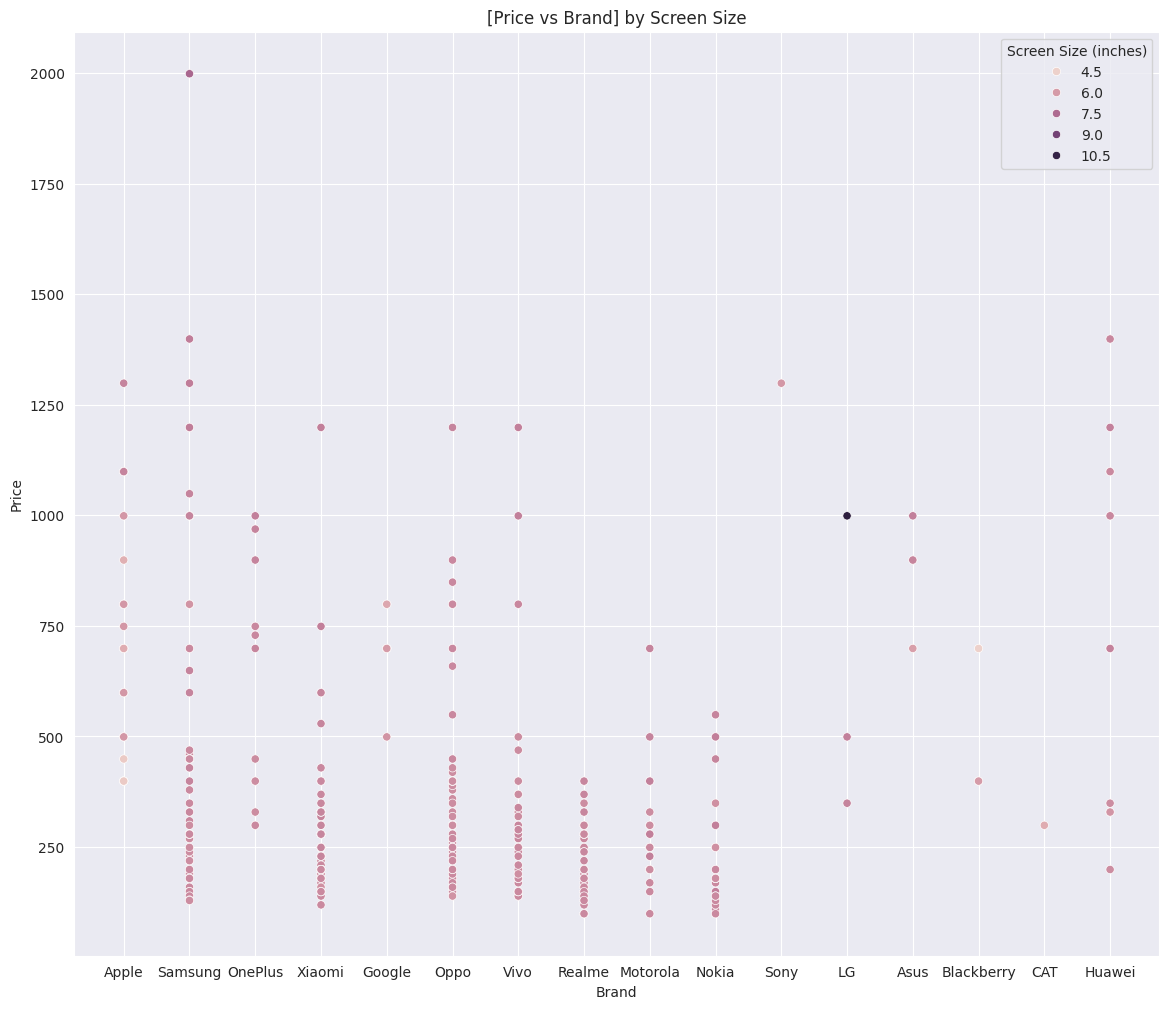

In [52]:
plt.figure(figsize=(14,12))
sns.set_style("darkgrid")
sns.scatterplot(data=df,x="Brand",y="Price",hue="Screen Size (inches)")
plt.title("[Price vs Brand] by Screen Size")

#### a scatter plot of Price vs Brand, with Screen Size as a hue

<ipython-input-53-4f6590b1207a>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df["Price"], shade=True, color="gray" , gridsize=100, alpha=0.5, linewidth=3)


<Axes: xlabel='Price', ylabel='Density'>

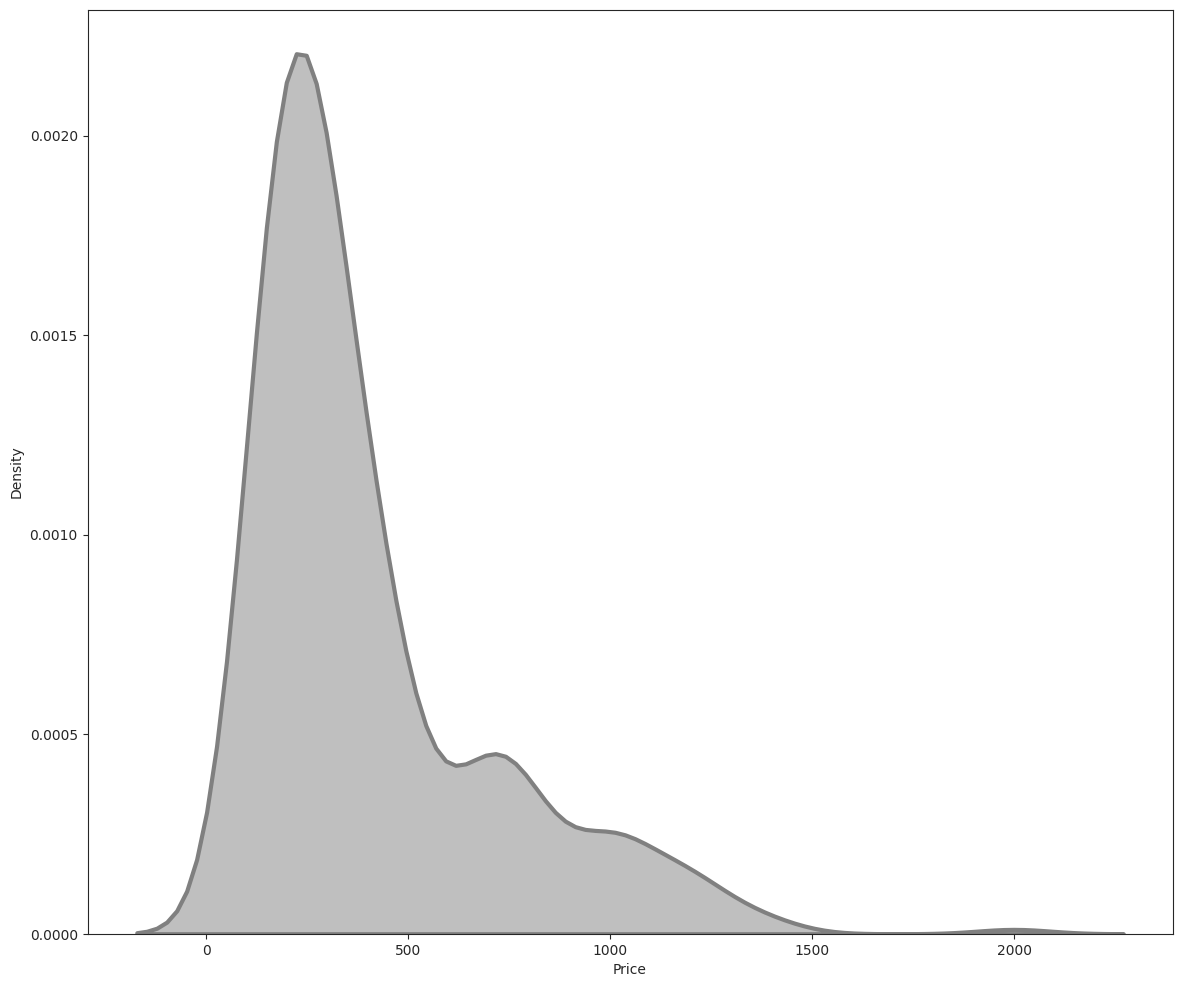

In [53]:
plt.figure(figsize=(14,12))
sns.set_style("ticks")
sns.kdeplot(data=df["Price"], shade=True, color="gray" , gridsize=100, alpha=0.5, linewidth=3)

#### visualizes the probability density of Prices

<Axes: xlabel='Battery Capacity (mAh)', ylabel='Brand'>

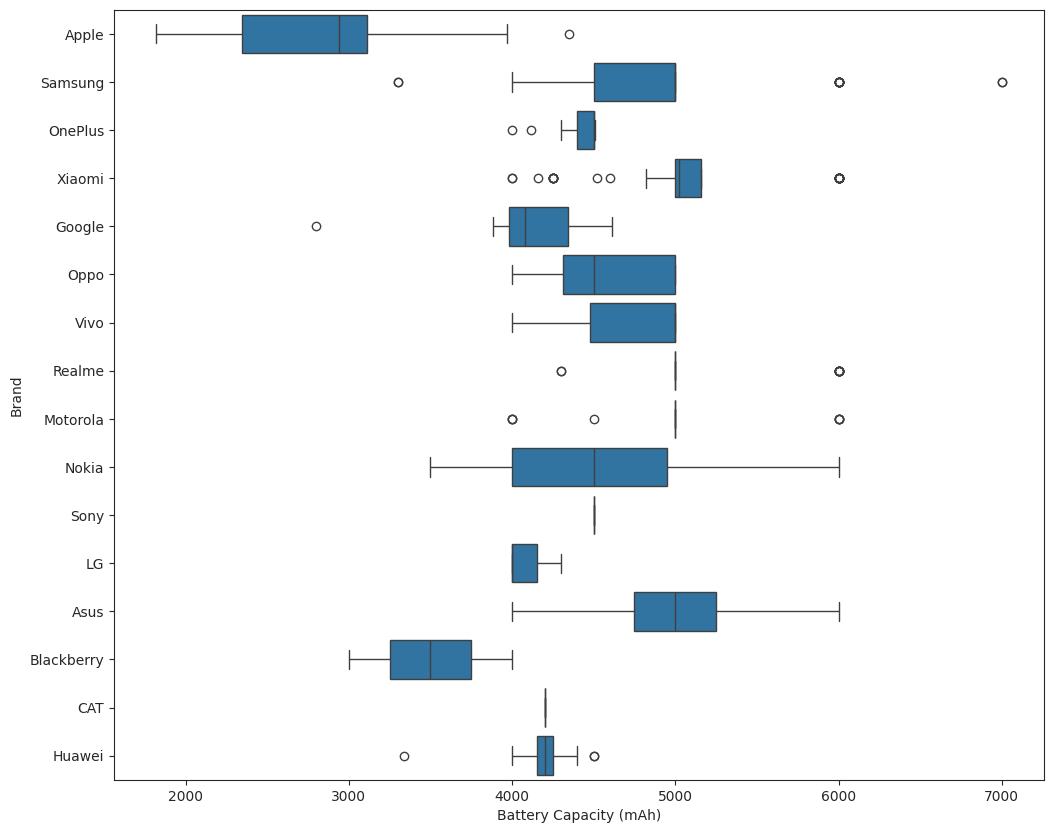

In [55]:
plt.figure(figsize=(12,10))

sns.boxplot(x="Battery Capacity (mAh)", y="Brand", data=df)

#### the distribution of Battery Capacities for each brand using quartiles.
#### for example apple have from less than 2000 to 4000 and the median of the Capacities is less than 3000

Text(0, 0.5, 'Count')

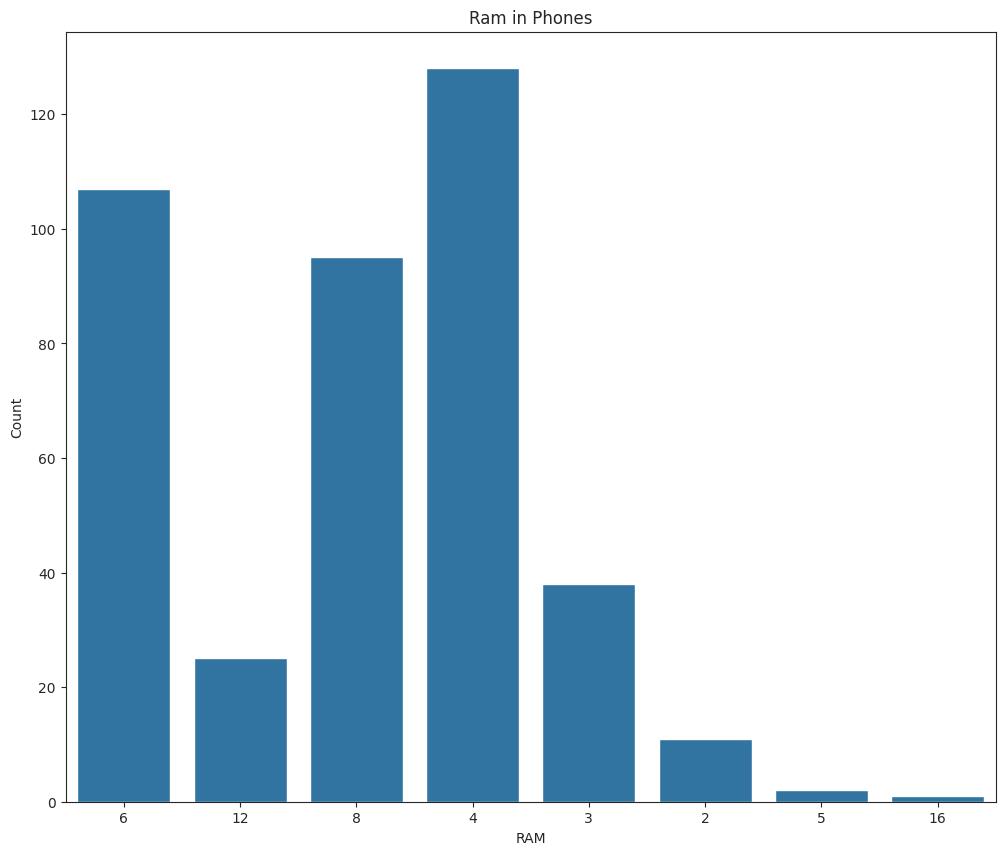

In [56]:
plt.figure(figsize=(12,10))

ax = sns.countplot(x='RAM', data=df)
ax.set_title('Ram in Phones')
ax.set_xlabel('RAM')
ax.set_ylabel('Count')

#### count of phones that have each ram value  

<Axes: xlabel='Battery Capacity (mAh)', ylabel='Price'>

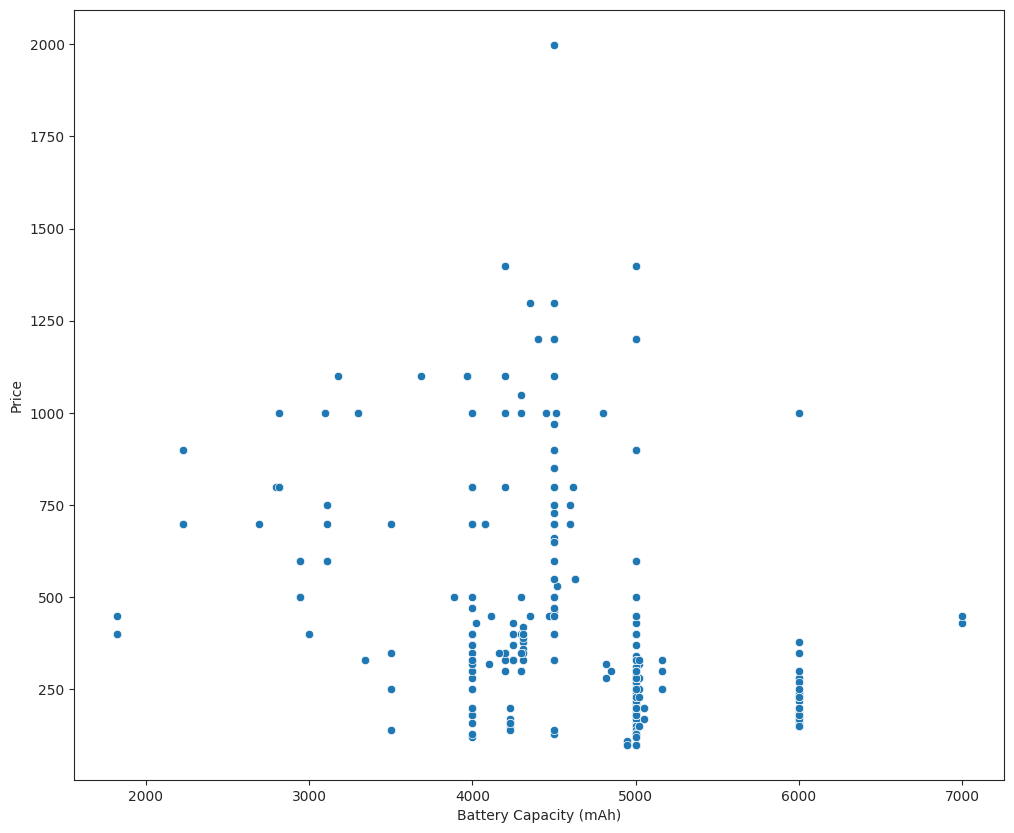

In [57]:
plt.figure(figsize=(12,10))

sns.scatterplot(data=df, x='Battery Capacity (mAh)', y='Price')

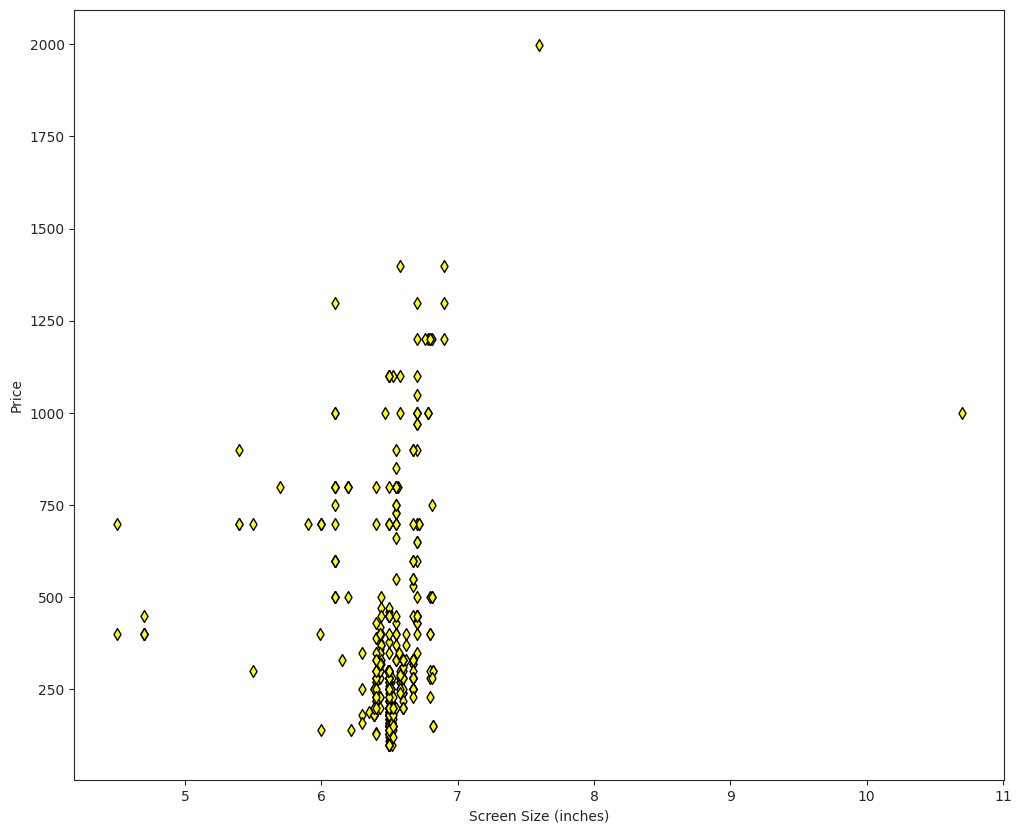

In [58]:
plt.figure(figsize=(12,10))
ax = sns.scatterplot(data=df, x='Screen Size (inches)', y='Price', color='yellow', edgecolor='black', linewidth=1, marker='d')


#### Prices for each Screen Size

<Axes: xlabel='Brand', ylabel='Price'>

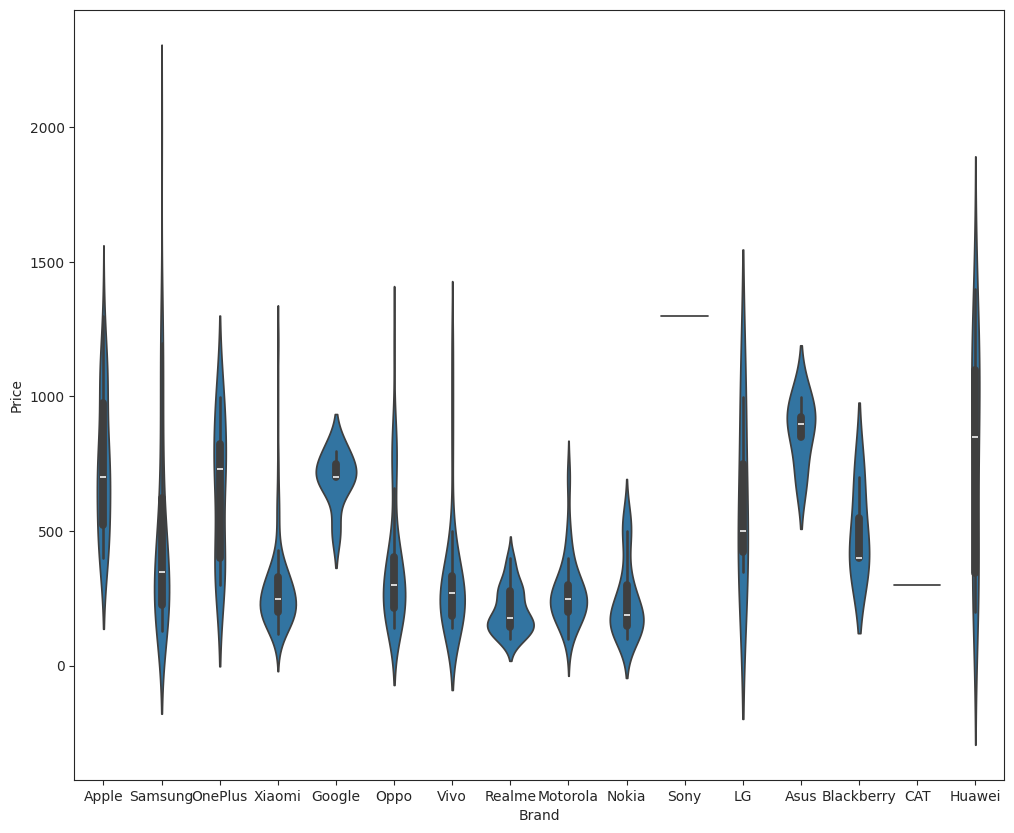

In [59]:
plt.figure(figsize=(12,10))

sns.violinplot(data=df, x='Brand', y='Price')

#### the distribution of device prices for each brand

<Axes: xlabel='Brand', ylabel='count'>

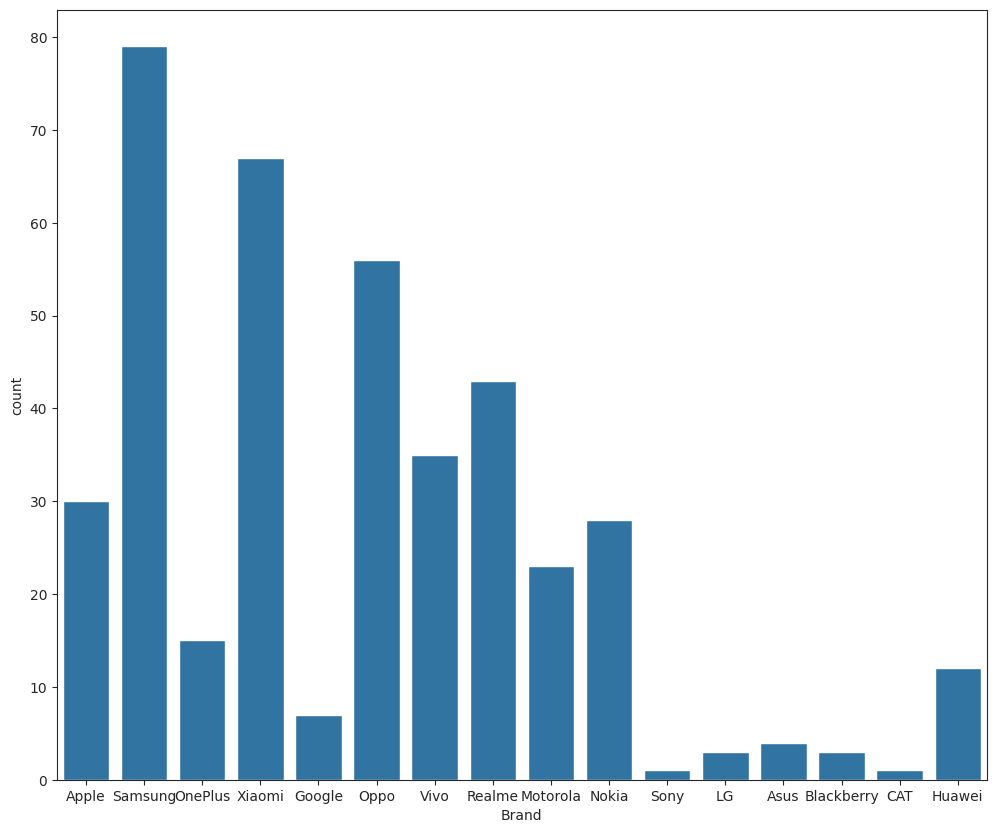

In [60]:
plt.figure(figsize=(12,10))

sns.countplot(data=df, x='Brand')

#### the count of devices for each brand

<Axes: xlabel='Price', ylabel='Storage'>

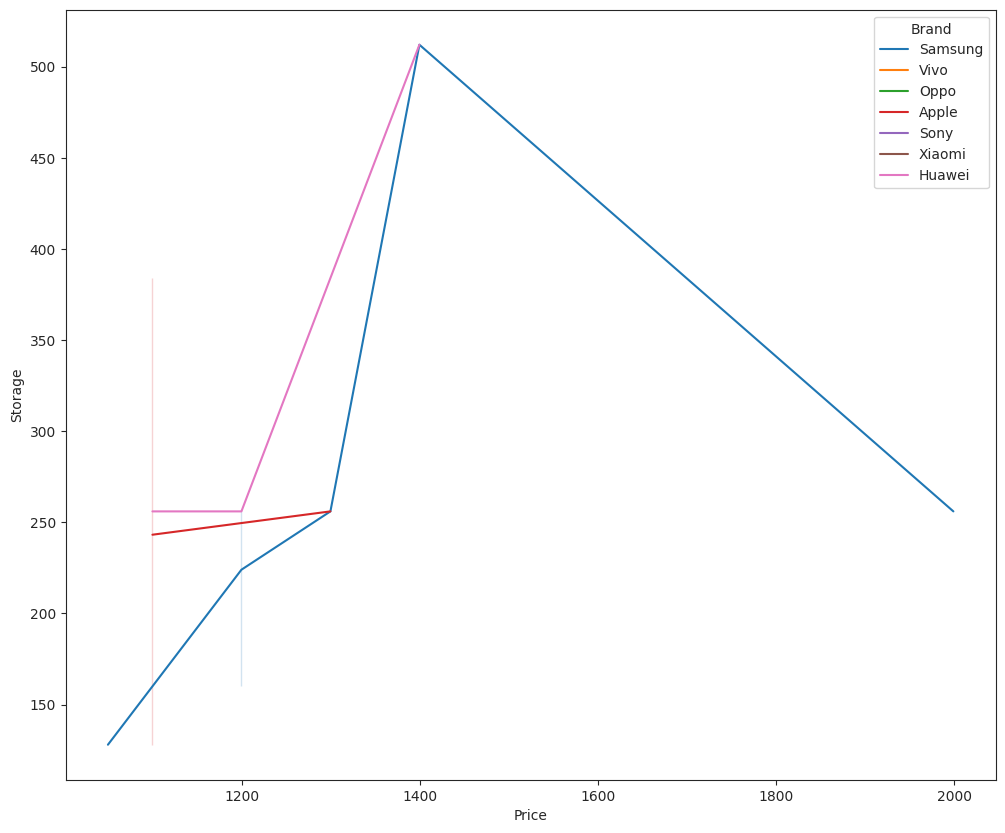

In [61]:
plt.figure(figsize=(12,10))
flags = flagship_phones
sns.lineplot(data=flags, x='Price', y='Storage', hue='Brand')


#### Flagship Phones: Storage vs Price by Brand

### After cleaning and visualizing the data, we can draw meaningful insights and conclusions that can help inform business decisions or guide further research

